# Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic.

1-  Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. 

2- The core data set is related to  the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. 

3-  Weather information are extracted from http://www.freemeteo.com.

# Associated tasks
=========================================

	- Regression: 
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
	
	- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of      the important events are 
		identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.


In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [2]:
# import the csv file 'day.csv' as a dataframe
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


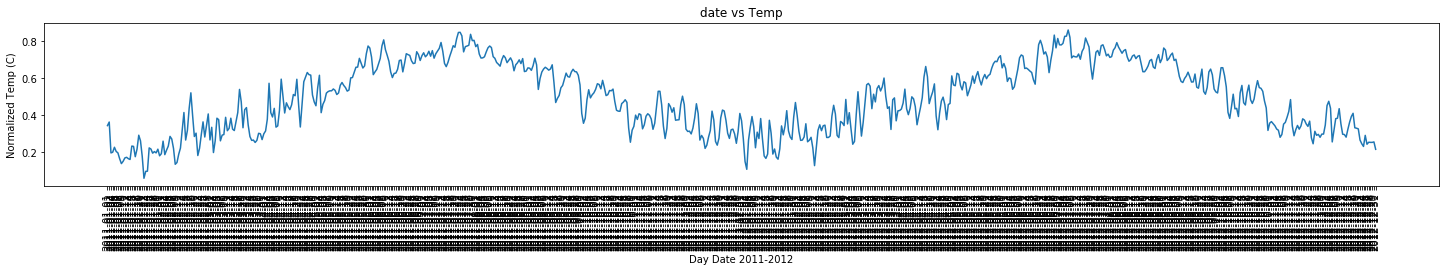

In [3]:
# plot day date vs Temp
plt.figure(figsize=(25,3))
plt.plot(df['dteday'],df['temp'])
plt.xticks( rotation='vertical')
plt.xlabel('Day Date 2011-2012')
plt.ylabel('Normalized Temp (C)')
plt.title('date vs Temp')
plt.show()

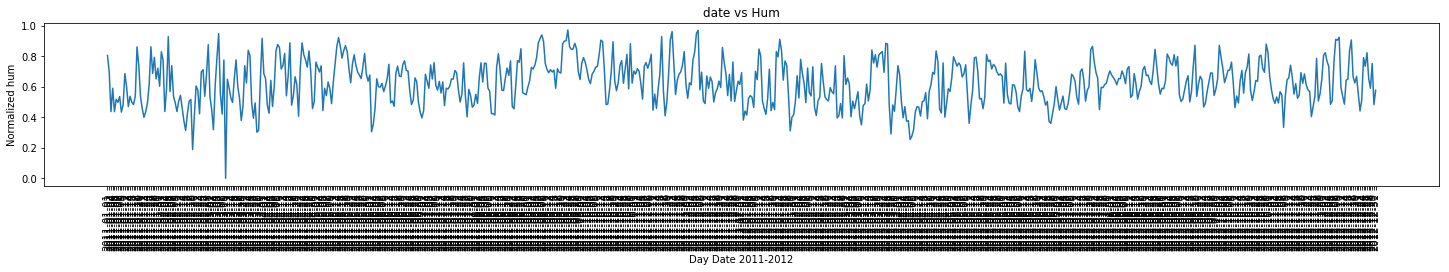

In [4]:
# plot day date vs humidity
plt.figure(figsize=(25,3))
plt.plot(df['dteday'],df['hum'])
plt.xticks( rotation='vertical')
plt.xlabel('Day Date 2011-2012')
plt.ylabel('Normalized hum')
plt.title('date vs Hum')
plt.show()

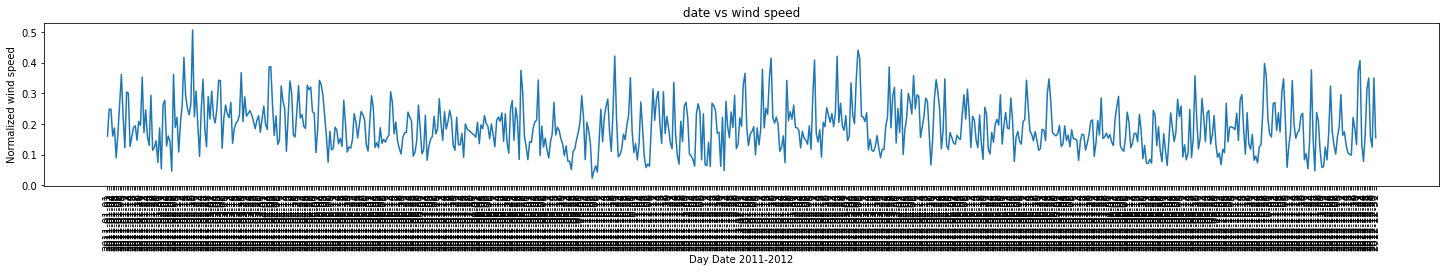

In [5]:
# plot day date vs normalized wind speed divided by 67
plt.figure(figsize=(25,3))
plt.plot(df['dteday'],df['windspeed'])
plt.xticks( rotation='vertical')
plt.xlabel('Day Date 2011-2012')
plt.ylabel('Normalized wind speed')
plt.title('date vs wind speed')
plt.show()

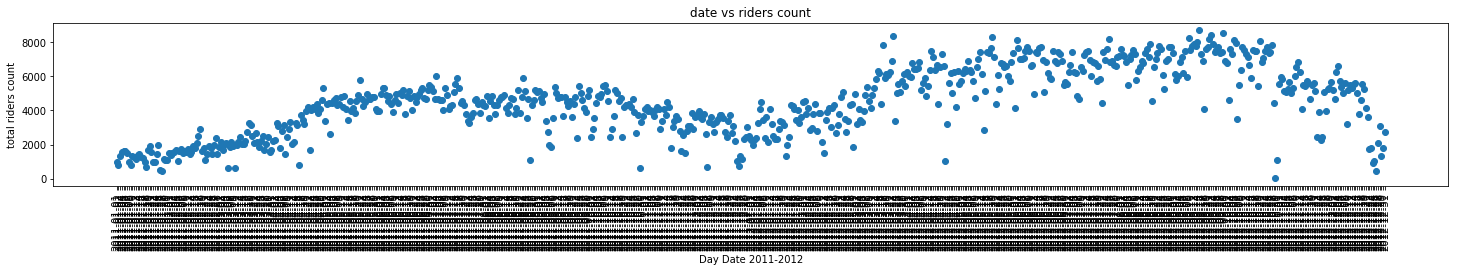

In [6]:
# plot day date vs registered users 
plt.figure(figsize=(25,3))
plt.scatter(df['dteday'],df['cnt'])
plt.xticks( rotation='vertical')
plt.xlabel('Day Date 2011-2012')
plt.ylabel('total riders count')
plt.title('date vs riders count')
plt.show()

# Split the date to months and year

In [7]:
# from datetime import datetime
df['year'] = [date.split('-')[0] for date in df['dteday']]
df['month'] = [date.split('-')[1] for date in df['dteday']]
df['day'] = [date.split('-')[2] for date in df['dteday']]
df['year_mo'] = [date.split('-')[0:2] for date in df['dteday']]

In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,year_mo
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,01,01,"[2011, 01]"
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,01,02,"[2011, 01]"
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,01,03,"[2011, 01]"
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,01,04,"[2011, 01]"
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,01,05,"[2011, 01]"


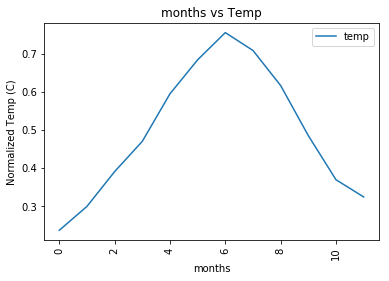

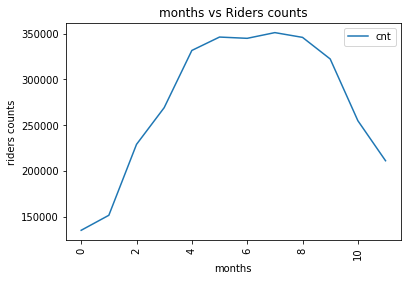

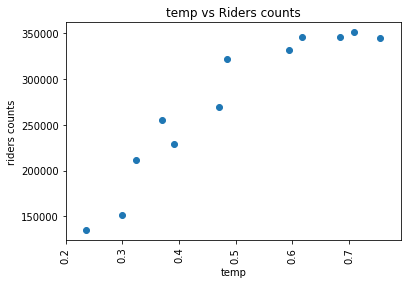

In [9]:
# data group by months

temp_mean = df.groupby(['month'])['temp'].mean()
temp_mean = pd.DataFrame(temp_mean)
temp_mean.reset_index(level=0,inplace=True)

#data groupby months and total rider
riders = df.groupby(['month'])['cnt'].sum()
riders = pd.DataFrame(riders)
riders.reset_index(level=0,inplace=True)

#Plot months vs Temp
temp_mean.plot(kind='line',legend=True)
plt.xticks( rotation='vertical')
plt.xlabel('months')
plt.ylabel('Normalized Temp (C)')
plt.title('months vs Temp')
plt.show()

#Plot months vs riders total count
riders.plot(kind='line',legend=True)
plt.xticks( rotation='vertical')
plt.xlabel('months')
plt.ylabel('riders counts')
plt.title('months vs Riders counts')
plt.show()

#Plot normalized temp vs total riders count
plt.scatter(temp_mean['temp'],riders['cnt'])
plt.xticks( rotation='vertical')
plt.xlabel('temp')
plt.ylabel('riders counts')
plt.title('temp vs Riders counts')
plt.show()


# Applying Linear Regression, Ridge Regression, LASSO Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(temp_mean['temp'],riders['cnt'],test_size= 0.2, random_state = 1)

# Model to fit a linear line
model = LinearRegression()
model.fit((X_train[:, np.newaxis]),y_train)
xfit = np.linspace(0, 1,9 )
yfit = model.predict(xfit[:, np.newaxis])
print(f'model coefficient: {int(model.coef_)}')
print(f'model intercept: {int(model.intercept_)}')
y_predict = model.predict(X_test[:, np.newaxis])
print (f'R_squared is: {r2_score(y_test,y_predict)}')

model coefficient: 413884
model intercept: 67707
R_squared is: 0.9321215387796197


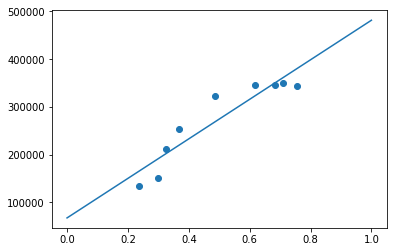

In [11]:
plt.scatter(X_train,y_train)
plt.plot(xfit, yfit);

### Using Polynomial Features

We will use quadratic polynomial feature

In [12]:
model_2 = make_pipeline(PolynomialFeatures(2),LinearRegression())
model_2.fit((X_train[:, np.newaxis]),y_train)
xfit = np.linspace(0, 1,10 )
yfit = model_2.predict(xfit[:, np.newaxis])
print(f'model coefficient: {int(model.coef_)}')
print(f'model intercept: {int(model.intercept_)}')
y_predict = model_2.predict(X_test[:, np.newaxis])
print (f'R_squared is: {r2_score(y_test,y_predict)}')

model coefficient: 413884
model intercept: 67707
R_squared is: 0.5295724893298701


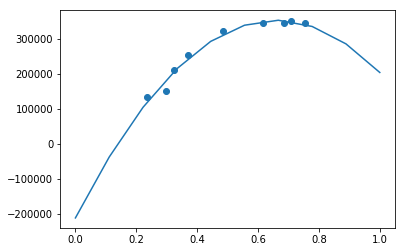

In [13]:
plt.scatter(X_train,y_train)
plt.plot(xfit, yfit);

In [14]:
model_3 = make_pipeline(PolynomialFeatures(3),LinearRegression())
model_3.fit((X_train[:, np.newaxis]),y_train)
xfit = np.linspace(0, 1,1000 )
yfit = model_3.predict(xfit[:, np.newaxis])
print(f'model coefficient: {int(model.coef_)}')
print(f'model intercept: {int(model.intercept_)}')
y_predict = model_3.predict(X_test[:, np.newaxis])
print (f'R_squared is: {r2_score(y_test,y_predict)}')

model coefficient: 413884
model intercept: 67707
R_squared is: 0.5334655570224127


In [15]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_predict)


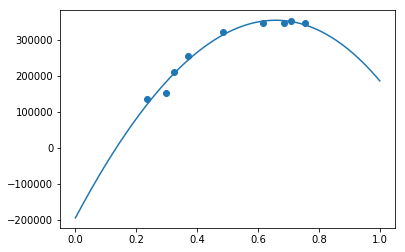

In [16]:
plt.scatter(X_train,y_train)
plt.plot(xfit, yfit);

# Ridge Regression

In [17]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train[:, np.newaxis],y_train)
xfit = np.linspace(0, 1,1000 )
yfit = model_ridge.predict(xfit[:, np.newaxis])
print(f'model coefficient: {int(model.coef_)}')
print(f'model intercept: {int(model.intercept_)}')
y_predict = model_ridge.predict(X_test[:, np.newaxis])
print (f'R_squared is: {r2_score(y_test,y_predict)}')

model coefficient: 413884
model intercept: 67707
R_squared is: 0.8327105200163498


model

In [18]:
y_predict = model_ridge.predict(X_test[:, np.newaxis])

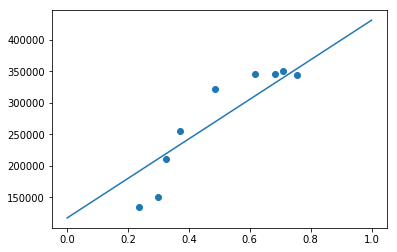

In [19]:
plt.scatter(X_train,y_train)
plt.plot(xfit, yfit);

### Iterate along with changing alpha [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

model coefficient: 413884
model intercept: 67707
R_squared is: 0.9321215387796197
model coefficient: 313971
model intercept: 117426
R_squared is: 0.8327105200163498
model coefficient: 252916
model intercept: 147808
R_squared is: 0.7322551160774073
model coefficient: 211741
model intercept: 168297
R_squared is: 0.6475013321805937
model coefficient: 182096
model intercept: 183049
R_squared is: 0.5779973026653942
model coefficient: 159732
model intercept: 194178
R_squared is: 0.5208659222175871
model coefficient: 142260
model intercept: 202872
R_squared is: 0.47342061198178054
model coefficient: 128234
model intercept: 209852
R_squared is: 0.43354609985210313
model coefficient: 116725
model intercept: 215579
R_squared is: 0.39964147918857995
model coefficient: 107112
model intercept: 220362
R_squared is: 0.3705009777463971
model coefficient: 98962
model intercept: 224418
R_squared is: 0.3452101125377297
model coefficient: 91965
model intercept: 227900
R_squared is: 0.32306757554053533
mod

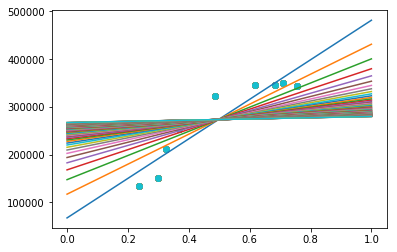

In [20]:
for i in np.arange(0,10,0.1):
    model_ridge_2 = Ridge(alpha=i)
    model_ridge_2.fit(X_train[:, np.newaxis],y_train)
    xfit = np.linspace(0, 1,1000 )
    yfit = model_ridge_2.predict(xfit[:, np.newaxis])
    print(f'model coefficient: {int(model_ridge_2.coef_)}')
    print(f'model intercept: {int(model_ridge_2.intercept_)}')
    y_predict = model_ridge_2.predict(X_test[:, np.newaxis])
    print (f'R_squared is: {r2_score(y_test,y_predict)}')
    plt.scatter(X_train,y_train)
    plt.plot(xfit, yfit);
    

# Experiment the day date temp vs cnt

### Linear regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(df['temp'],df['cnt'],test_size= 0.2, random_state = 1)

# Model to fit a linear line
model = LinearRegression()
model.fit((X_train[:, np.newaxis]),y_train)
xfit = np.linspace(0, 1,9 )
yfit = model.predict(xfit[:, np.newaxis])
print(f'model coefficient: {int(model.coef_)}')
print(f'model intercept: {int(model.intercept_)}')
y_predict = model.predict(X_test[:, np.newaxis])
print (f'R_squared is: {r2_score(y_test,y_predict)}')

model coefficient: 6495
model intercept: 1321
R_squared is: 0.4910019389218214


Text(0.5,1,'Temp vs riders')

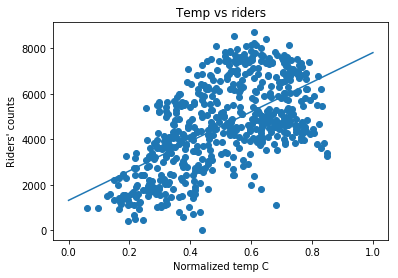

In [290]:
plt.scatter(X_train,y_train)
plt.plot(xfit, yfit);
plt.xlabel('Normalized temp C')
plt.ylabel("Riders' counts")
plt.title('Temp vs riders')

### Polynomial Regression 

#### Polynomial feature degree = 2

In [315]:

model_2 = make_pipeline(PolynomialFeatures(2),LinearRegression())
model_2.fit((X_train[:, np.newaxis]),y_train)
xfit = np.linspace(0, 1,10 )
yfit = model_2.predict(xfit[:, np.newaxis])
y_predict= model_2.predict(X_test[:, np.newaxis])
print (f'R_squared of degree= {2} is: {r2_score(y_test,y_predict)}')


R_squared of degree= 2 is: 0.49963466001691637


Text(0.5,1,'Temp vs riders for fegree =2')

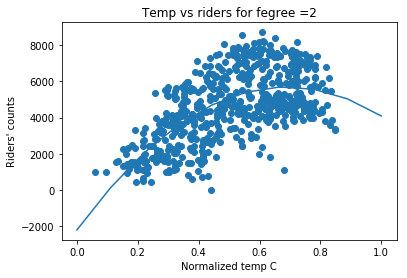

In [316]:
plt.scatter(X_train,y_train)
plt.plot(xfit, yfit);
plt.xlabel('Normalized temp C')
plt.ylabel("Riders' counts")
plt.title('Temp vs riders for fegree =2')

In [314]:
for i in np.arange(2,20,1):
    model_2 = make_pipeline(PolynomialFeatures(i),LinearRegression())
    model_2.fit((X_train[:, np.newaxis]),y_train)
    xfit = np.linspace(0, 1,10 )
    yfit = model_2.predict(xfit[:, np.newaxis])
    y_predict= model_2.predict(X_test[:, np.newaxis])
    print (f'R_squared of degree= {i} is: {r2_score(y_test,y_predict)}')
   

R_squared of degree= 2 is: 0.49963466001691637
R_squared of degree= 3 is: 0.51193586257025
R_squared of degree= 4 is: 0.5115168789452
R_squared of degree= 5 is: 0.5110027387639899
R_squared of degree= 6 is: 0.5061181182393746
R_squared of degree= 7 is: 0.5012841308007356
R_squared of degree= 8 is: 0.49942585097841574
R_squared of degree= 9 is: 0.5166771980214533
R_squared of degree= 10 is: 0.5188063197431358
R_squared of degree= 11 is: 0.4860352417159709
R_squared of degree= 12 is: 0.4754335780977875
R_squared of degree= 13 is: 0.47602814075681166
R_squared of degree= 14 is: 0.43586883486395
R_squared of degree= 15 is: 0.40266897738427454
R_squared of degree= 16 is: 0.5057224598458039
R_squared of degree= 17 is: 0.47444874486866084
R_squared of degree= 18 is: 0.4820847136212495
R_squared of degree= 19 is: 0.4517675892582972


Text(0.5,1,'Temp vs riders')

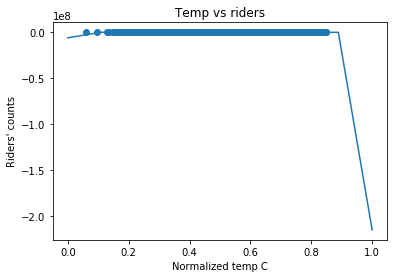

In [310]:
plt.scatter(X_train,y_train)
plt.plot(xfit, yfit);
plt.xlabel('Normalized temp C')
plt.ylabel("Riders' counts")
plt.title('Temp vs riders')

# Ridge Regression for temp vs Riders

model coefficient: 6495
model intercept: 1321
R_squared is: 0.4910019389218214
model coefficient: 6165
model intercept: 1488
R_squared is: 0.4852331394479723
model coefficient: 5866
model intercept: 1638
R_squared is: 0.4779901860182535
model coefficient: 5595
model intercept: 1775
R_squared is: 0.4697462774247352
model coefficient: 5348
model intercept: 1899
R_squared is: 0.46084560939362174
model coefficient: 5121
model intercept: 2013
R_squared is: 0.45153985545277076
model coefficient: 4913
model intercept: 2118
R_squared is: 0.4420136160821273
model coefficient: 4722
model intercept: 2215
R_squared is: 0.4324024115826687
model coefficient: 4545
model intercept: 2304
R_squared is: 0.4228055574831726
model coefficient: 4380
model intercept: 2387
R_squared is: 0.4132954784759415


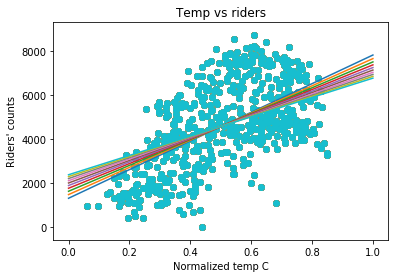

In [319]:
for i in np.arange(0,10,1):
    model_ridge_2 = Ridge(alpha=i)
    model_ridge_2.fit(X_train[:, np.newaxis],y_train)
    xfit = np.linspace(0, 1,1000 )
    yfit = model_ridge_2.predict(xfit[:, np.newaxis])
    print(f'model coefficient: {int(model_ridge_2.coef_)}')
    print(f'model intercept: {int(model_ridge_2.intercept_)}')
    y_predict = model_ridge_2.predict(X_test[:, np.newaxis])
    print (f'R_squared is: {r2_score(y_test,y_predict)}')
    plt.scatter(X_train,y_train)
    plt.plot(xfit, yfit);
    plt.xlabel('Normalized temp C')
    plt.ylabel("Riders' counts")
    plt.title('Temp vs riders')

In [407]:
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(df[['temp','atemp','hum','windspeed']],df['cnt'],test_size=0.2,random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(temp_mean['temp'],riders['cnt'],test_size= 0.2, random_state = 1)
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)
# xfit = np.linspace(0, 1,1000 )
yfit = model_linear.predict(X_test)

print(f'model parameters: {model_ridge.get_params()}')
y_predict = model_linear.predict(X_test)
print(f'model score: {model_linear.score(X_test,y_test)}')
print (f'R_squared is: {r2_score(y_test,y_predict)}')

model parameters: {'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
model score: 0.4924276351409713
R_squared is: 0.4924276351409713


# Multiple Features with Ridge Regression

In [360]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year,day,year_mo
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,01,2011,01,"[2011, 01]"
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,01,2011,02,"[2011, 01]"
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,01,2011,03,"[2011, 01]"
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,01,2011,04,"[2011, 01]"
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,01,2011,05,"[2011, 01]"


In [403]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(df[['temp','atemp','hum','windspeed']],df['cnt'],test_size=0.2,random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(temp_mean['temp'],riders['cnt'],test_size= 0.2, random_state = 1)
model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train,y_train)
# xfit = np.linspace(0, 1,1000 )
yfit = model_ridge.predict(X_test)

print(f'model parameters: {model_ridge.get_params()}')
y_predict = model_ridge.predict(X_test)
print(f'model score: {model_ridge.score(X_test,y_test)}')
print (f'R_squared is: {r2_score(y_test,y_predict)}')

model parameters: {'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
model score: 0.49672228833046694
R_squared is: 0.49672228833046694


# LASSO Regression

In [405]:
from sklearn.linear_model import Lasso
X_train,X_test,y_train,y_test = train_test_split(df[['temp','atemp','hum','windspeed']],df['cnt'],test_size=0.2,random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(temp_mean['temp'],riders['cnt'],test_size= 0.2, random_state = 1)
model_lasso = Lasso(alpha=1)
model_lasso.fit(X_train,y_train)
# xfit = np.linspace(0, 1,1000 )
yfit = model_lasso.predict(X_test)

print(f'model parameters: {model_ridge.get_params()}')
y_predict = model_lasso.predict(X_test)
print(f'model score: {model_lasso.score(X_test,y_test)}')
print (f'R_squared is: {r2_score(y_test,y_predict)}')

model parameters: {'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
model score: 0.4936332900937208
R_squared is: 0.4936332900937208
